In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv('OnlineNewsPopularity.csv')

In [31]:
df.shape

(39644, 61)

In [32]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [34]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

1. There are no null values in the given data
2. Except url, all are continuous varibles
3. There are 2 non predicting attributes, 58 predicting attributes and one target (shares)
4. There are 39644 instances

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


From above:
1. Extreme values in few varibales. Look at that observation specifically.

In [8]:
# Droppping the irrelavant columns and converting the target

In [36]:
df.drop(['url',' timedelta'],axis=1,inplace=True)

In [37]:
df.shape

(39644, 59)

In [38]:
df.columns=df.columns.str.replace(' ', '')

In [39]:
data=df.copy()

In [40]:
# Target
df.loc[df['shares']<1400,'shares']=0 #unpopular

In [41]:
df.loc[df['shares']>=1400,'shares']=1 #popular

In [42]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


## Analysing the Target

In [43]:
df.shares.value_counts(1)

1    0.533599
0    0.466401
Name: shares, dtype: float64

The data is not imbalanced. 53% of the posts are popular and 46% are not popular. The threshold for shares is 1400

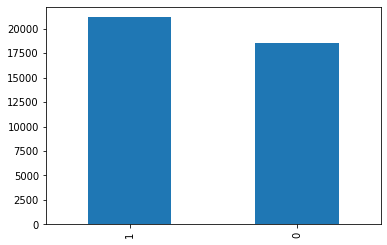

In [44]:
df.shares.value_counts().plot(kind='bar')
plt.show()

## EDA

In [45]:
num=[]
cat=[]
for col in df.columns:
    if col!='shares':
        if df[col].nunique()>2:
            num.append(col)
        else:
            cat.append(col)

A few columns have only 2 unique values - 0 and 1. Making a separate group of those variables

In [46]:
len(num), len(cat)

(44, 14)

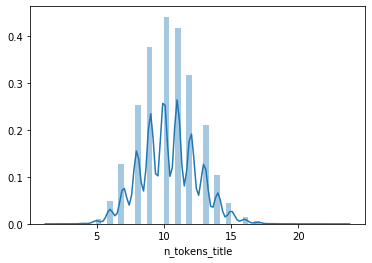

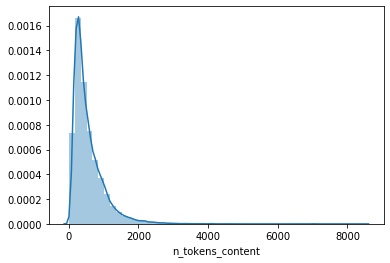

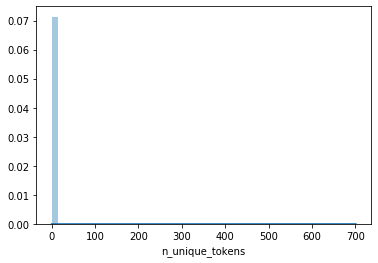

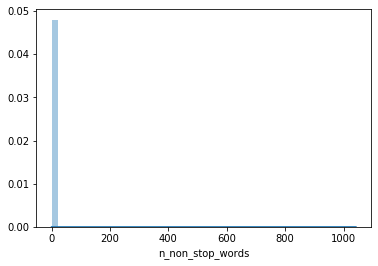

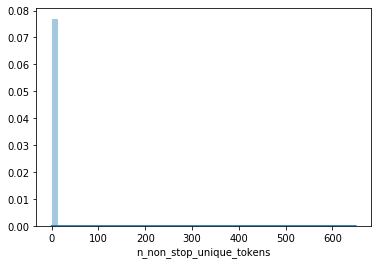

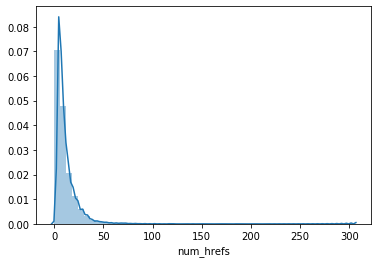

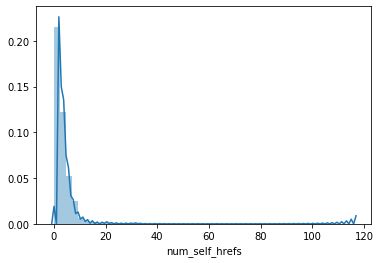

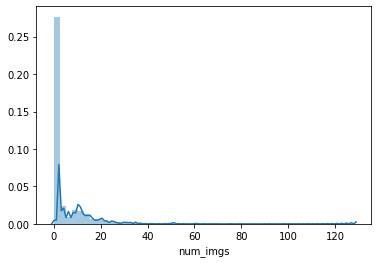

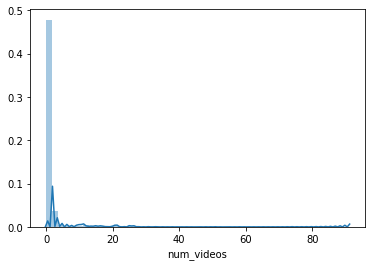

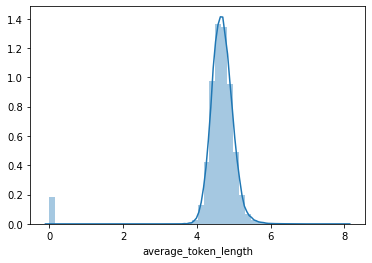

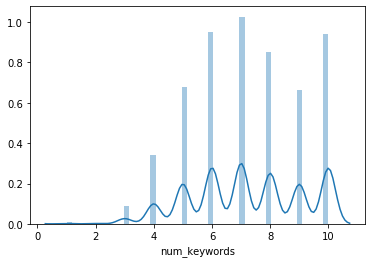

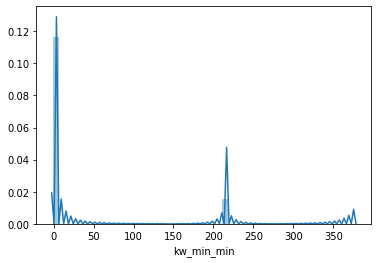

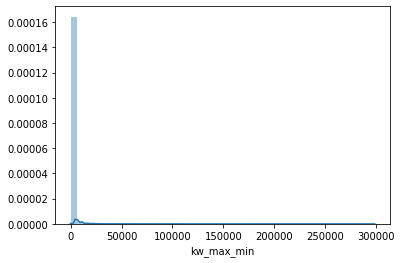

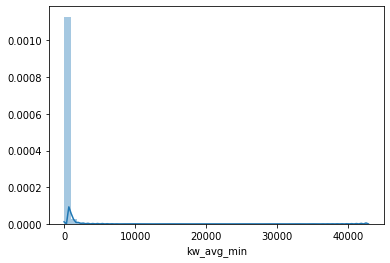

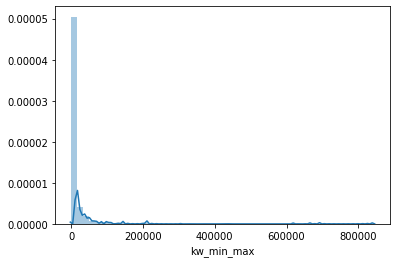

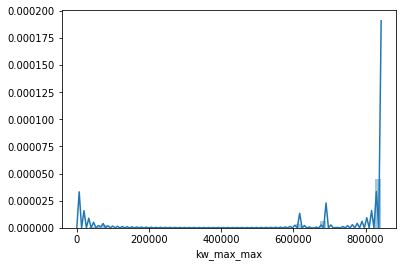

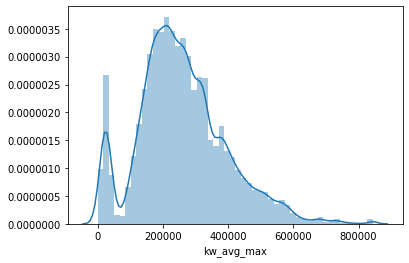

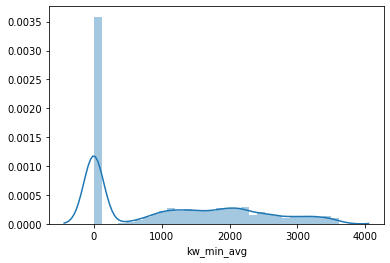

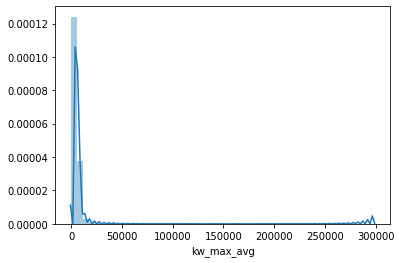

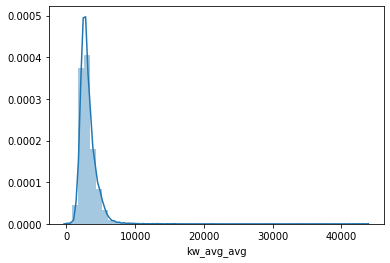

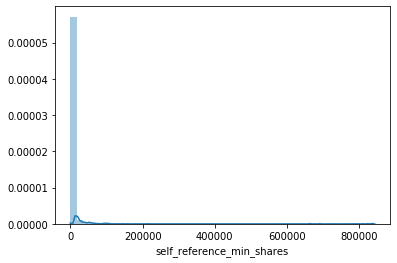

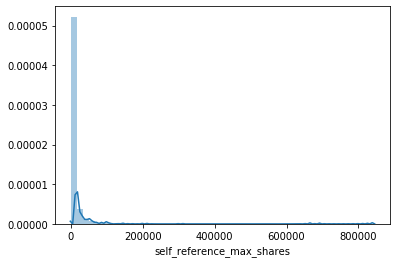

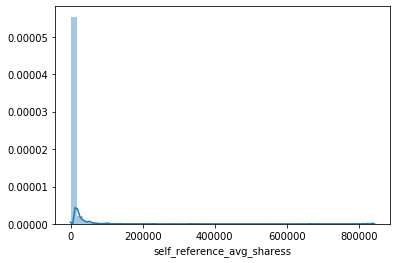

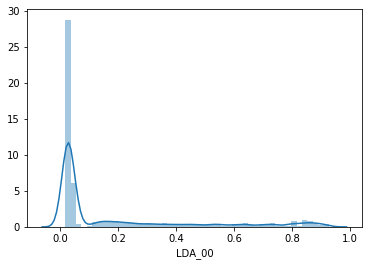

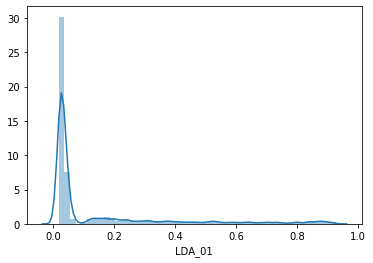

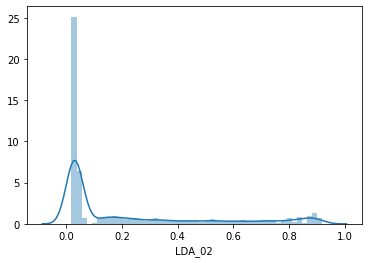

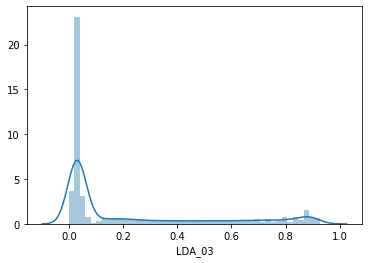

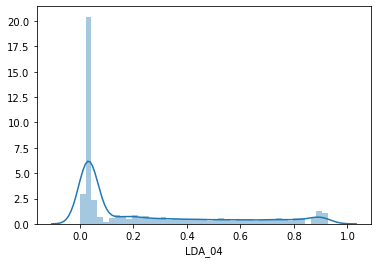

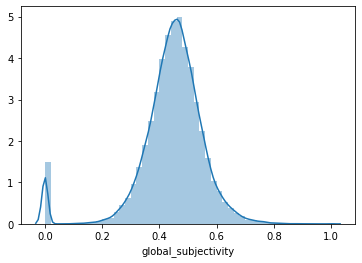

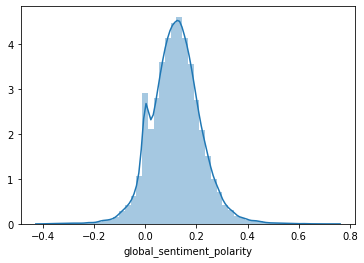

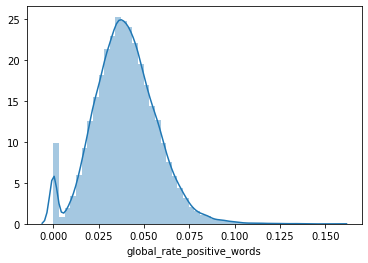

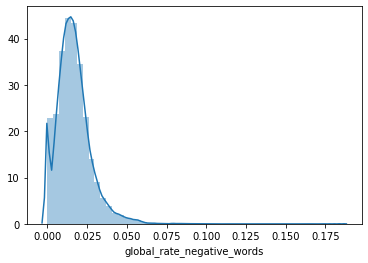

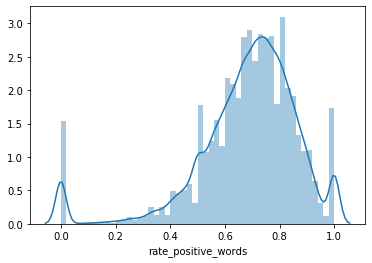

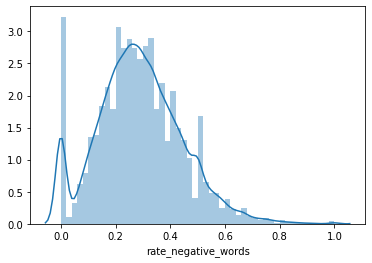

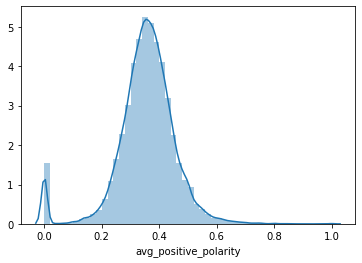

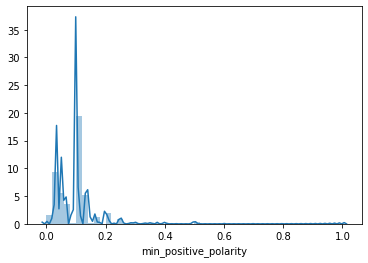

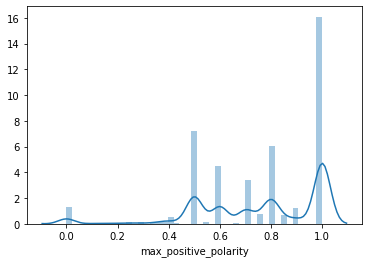

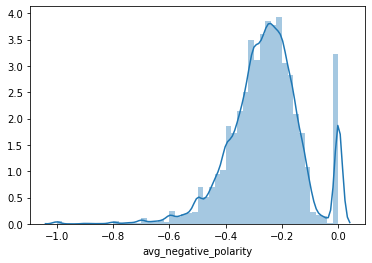

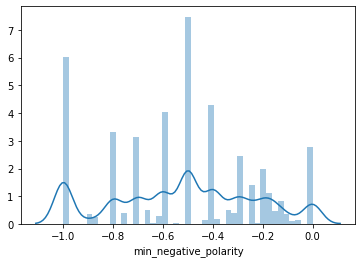

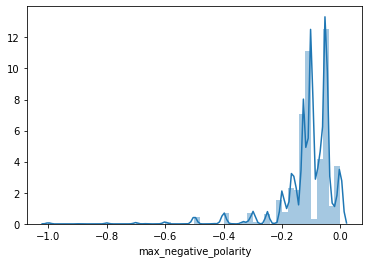

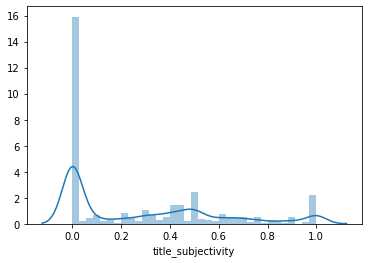

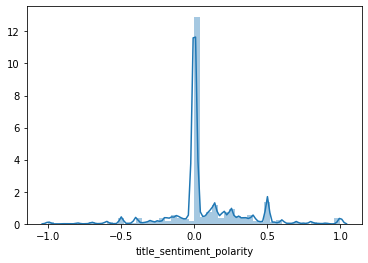

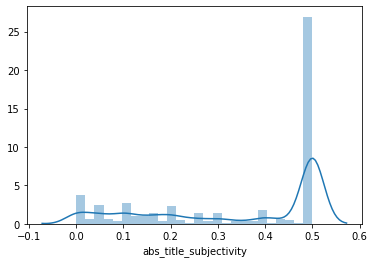

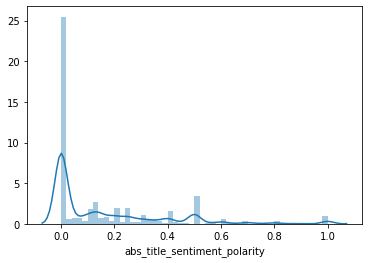

In [47]:
for col in num:
    sns.distplot(df[col])
    plt.show()

1. Most of the distributions are right skewed.
2. Outliers are present

In [48]:
for col in cat:
    print(df[col].value_counts())
    

0.0    37545
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64
0.0    32587
1.0     7057
Name: data_channel_is_entertainment, dtype: int64
0.0    33386
1.0     6258
Name: data_channel_is_bus, dtype: int64
0.0    37321
1.0     2323
Name: data_channel_is_socmed, dtype: int64
0.0    32298
1.0     7346
Name: data_channel_is_tech, dtype: int64
0.0    31217
1.0     8427
Name: data_channel_is_world, dtype: int64
0.0    32983
1.0     6661
Name: weekday_is_monday, dtype: int64
0.0    32254
1.0     7390
Name: weekday_is_tuesday, dtype: int64
0.0    32209
1.0     7435
Name: weekday_is_wednesday, dtype: int64
0.0    32377
1.0     7267
Name: weekday_is_thursday, dtype: int64
0.0    33943
1.0     5701
Name: weekday_is_friday, dtype: int64
0.0    37191
1.0     2453
Name: weekday_is_saturday, dtype: int64
0.0    36907
1.0     2737
Name: weekday_is_sunday, dtype: int64
0.0    34454
1.0     5190
Name: is_weekend, dtype: int64


1. Observed that data distribution among the sub classes for all the variables is highly imbalanced
2. Also, variables related to type of data channel have one value as 0 and 1


#### Boxplots

n_tokens_title


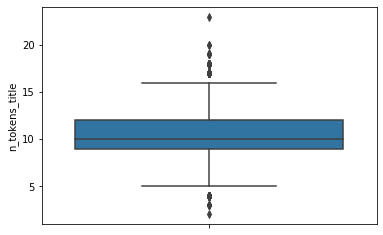

n_tokens_content


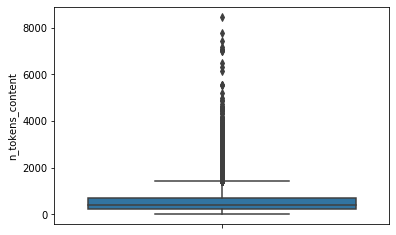

n_unique_tokens


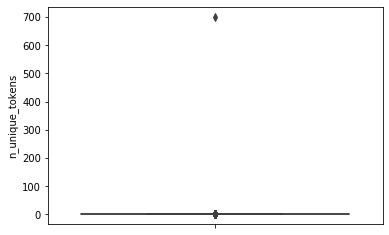

n_non_stop_words


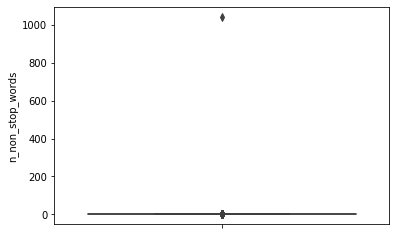

n_non_stop_unique_tokens


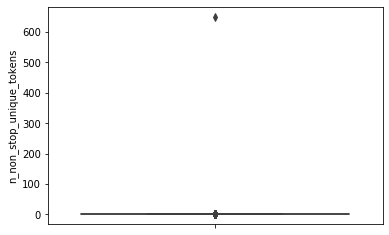

num_hrefs


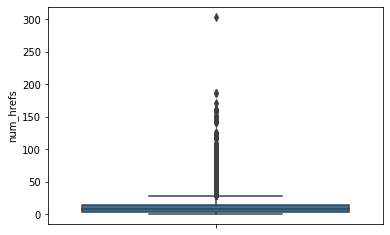

num_self_hrefs


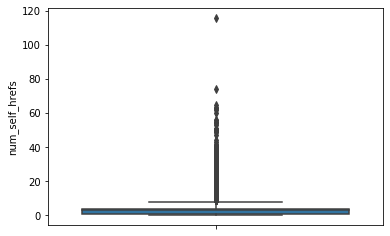

num_imgs


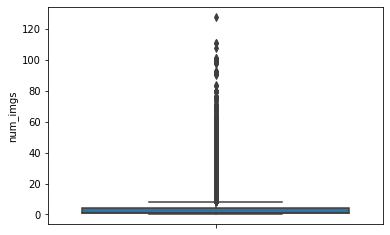

num_videos


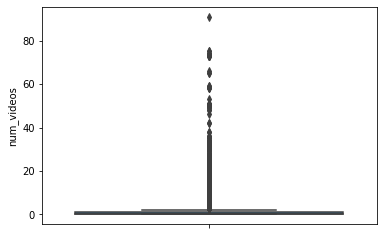

average_token_length


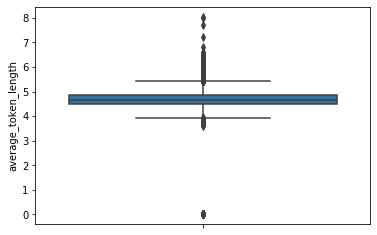

num_keywords


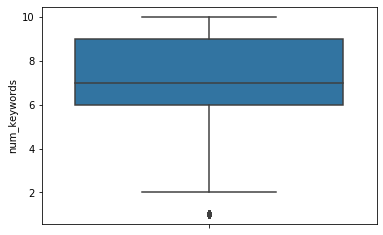

kw_min_min


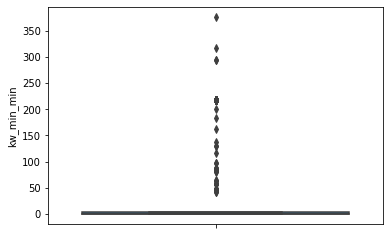

kw_max_min


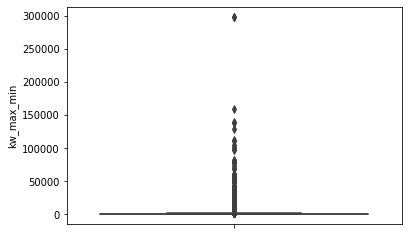

kw_avg_min


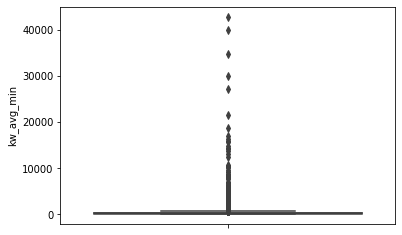

kw_min_max


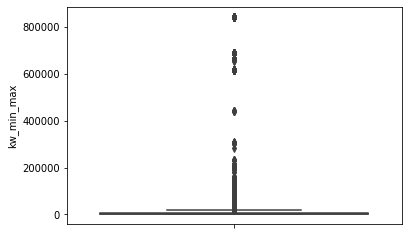

kw_max_max


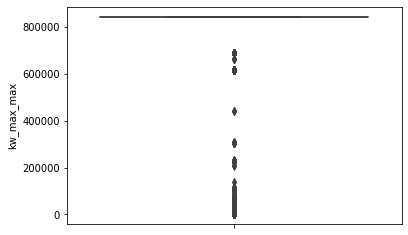

kw_avg_max


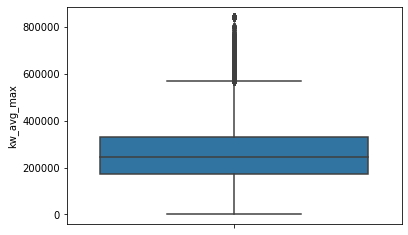

kw_min_avg


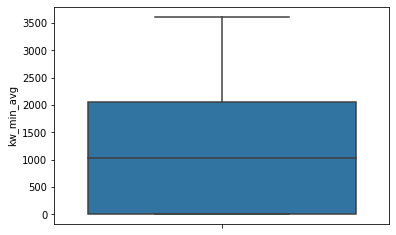

kw_max_avg


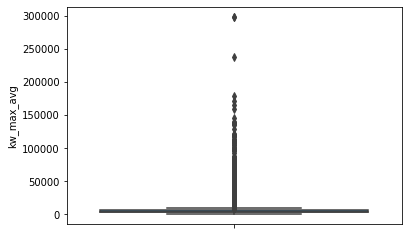

kw_avg_avg


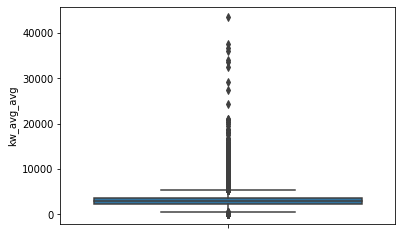

self_reference_min_shares


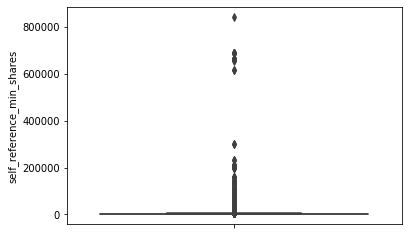

self_reference_max_shares


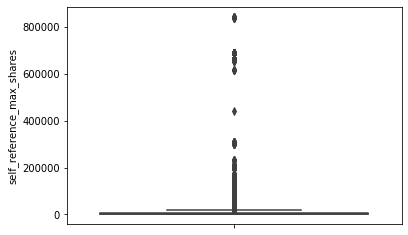

self_reference_avg_sharess


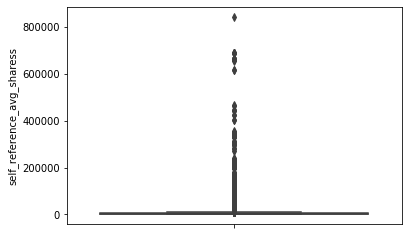

LDA_00


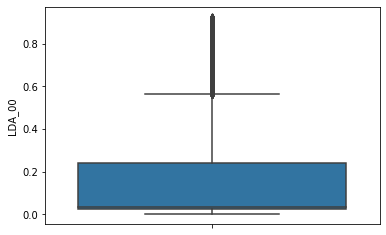

LDA_01


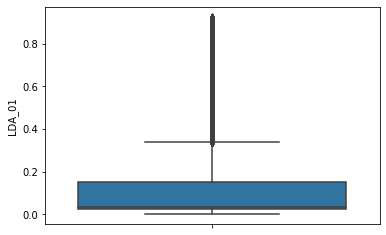

LDA_02


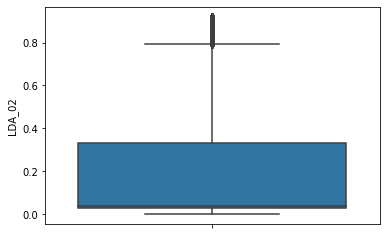

LDA_03


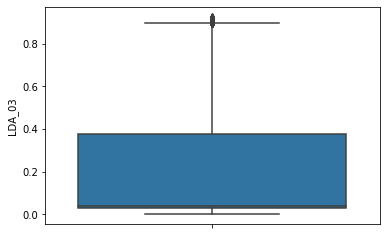

LDA_04


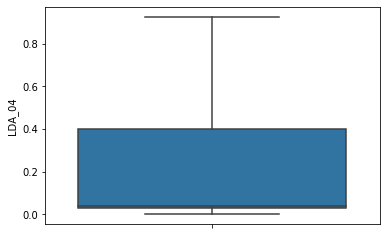

global_subjectivity


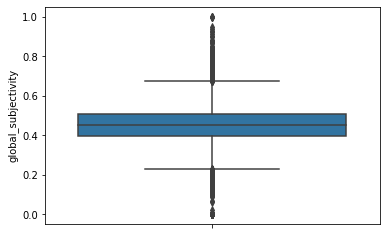

global_sentiment_polarity


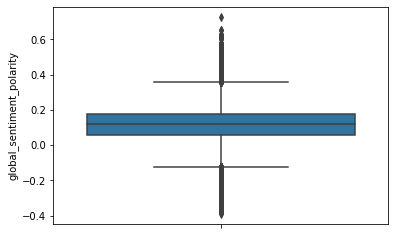

global_rate_positive_words


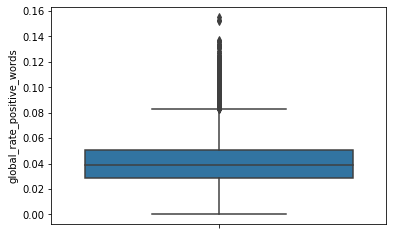

global_rate_negative_words


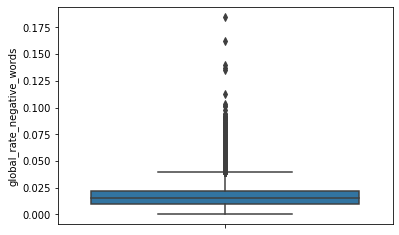

rate_positive_words


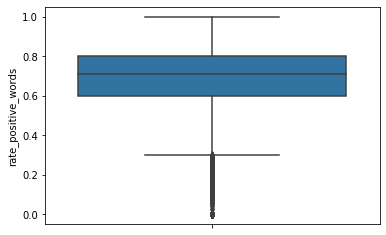

rate_negative_words


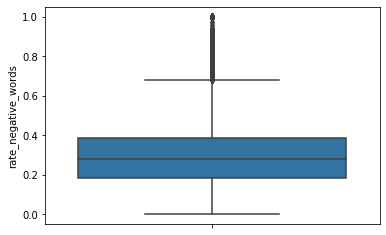

avg_positive_polarity


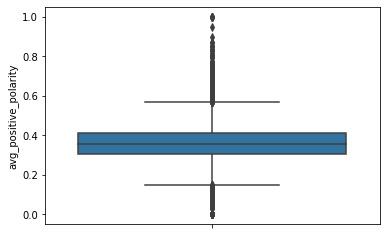

min_positive_polarity


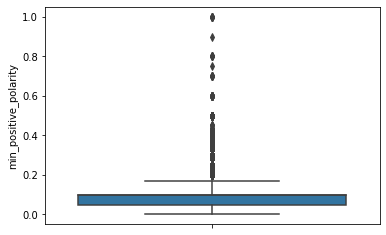

max_positive_polarity


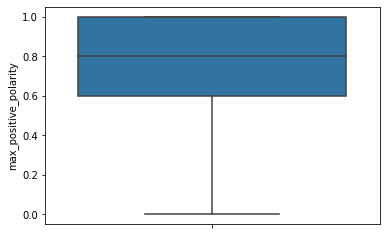

avg_negative_polarity


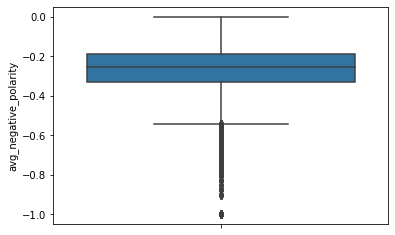

min_negative_polarity


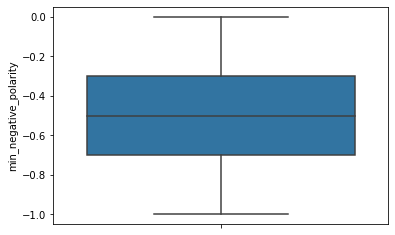

max_negative_polarity


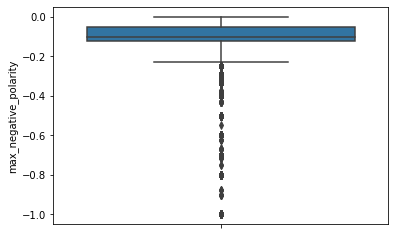

title_subjectivity


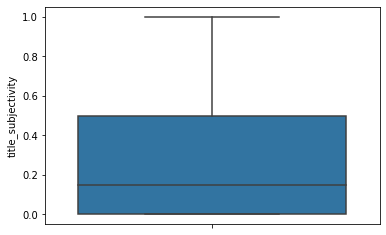

title_sentiment_polarity


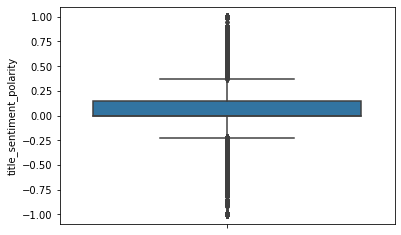

abs_title_subjectivity


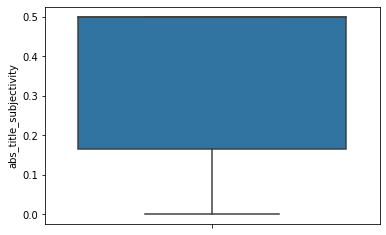

abs_title_sentiment_polarity


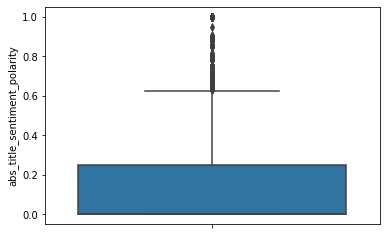

In [49]:
for col in num:
    print(col)
    sns.boxplot(y=df[col])
    plt.show()

### Treating Outliers 

1. The maximum value in every different attribute corresponds to different instance. Thus, deleting these many observations is not a wise option
2. Also Z score values lead to deleing of 40% of data which is again not a good approach
3. Thus, we go ahead and cap the values at 1st and 99th percentile and thus treating the outliers

In [60]:
for col in num:
    percentiles=df[col].quantile([0.01,0.99]).values
    df.loc[df[col]<=percentiles[0],col]=percentiles[0]
    df.loc[df[col]>=percentiles[1],col]=percentiles[1]

Checking the skewness

In [61]:
df[num].skew()

n_tokens_title                  0.098318
n_tokens_content                1.663434
n_unique_tokens                -1.528958
n_non_stop_words               -5.531834
n_non_stop_unique_tokens       -2.436101
num_hrefs                       2.119621
num_self_hrefs                  2.519975
num_imgs                        2.474144
num_videos                      4.532052
average_token_length           -4.639645
num_keywords                   -0.113162
kw_min_min                      2.373334
kw_max_min                      4.705625
kw_avg_min                      2.909615
kw_min_max                      4.952581
kw_max_max                     -2.641479
kw_avg_max                      0.473937
kw_min_avg                      0.464632
kw_max_avg                      3.277704
kw_avg_avg                      1.195012
self_reference_min_shares       4.899794
self_reference_max_shares       3.818907
self_reference_avg_sharess      4.149795
LDA_00                          1.564027
LDA_01          

Different transformations can be applied to treat these features to treat the outliers and reduce skewness 

In [63]:
lst1=[] 
for col in num: 
    if((df[col].skew()<0.1) or (df[col].skew()>0.2)): 
        lst1.append(col)

In [64]:
len(lst1)

42

In [65]:
import scipy.stats as st
for col in num:
    if col in lst1: 
        df[col]=list(st.yeojohnson(df[col])[0]) 
df[num].skew()

n_tokens_title                 -0.019950
n_tokens_content                0.082758
n_unique_tokens                 0.104096
n_non_stop_words               -5.531834
n_non_stop_unique_tokens        0.055740
num_hrefs                       0.006309
num_self_hrefs                 -0.000657
num_imgs                        0.178428
num_videos                      0.668557
average_token_length           -0.441360
num_keywords                   -0.081615
kw_min_min                      0.574920
kw_max_min                      0.328776
kw_avg_min                      0.220652
kw_min_max                     -0.073430
kw_max_max                     -1.694819
kw_avg_max                     -0.044422
kw_min_avg                     -0.231165
kw_max_avg                      0.145608
kw_avg_avg                      0.000185
self_reference_min_shares      -0.110639
self_reference_max_shares      -0.200148
self_reference_avg_sharess     -0.194870
LDA_00                          0.800869
LDA_01          

We see that after the transformations, the skewness of the data has reduced highly

### Correlation Matrix

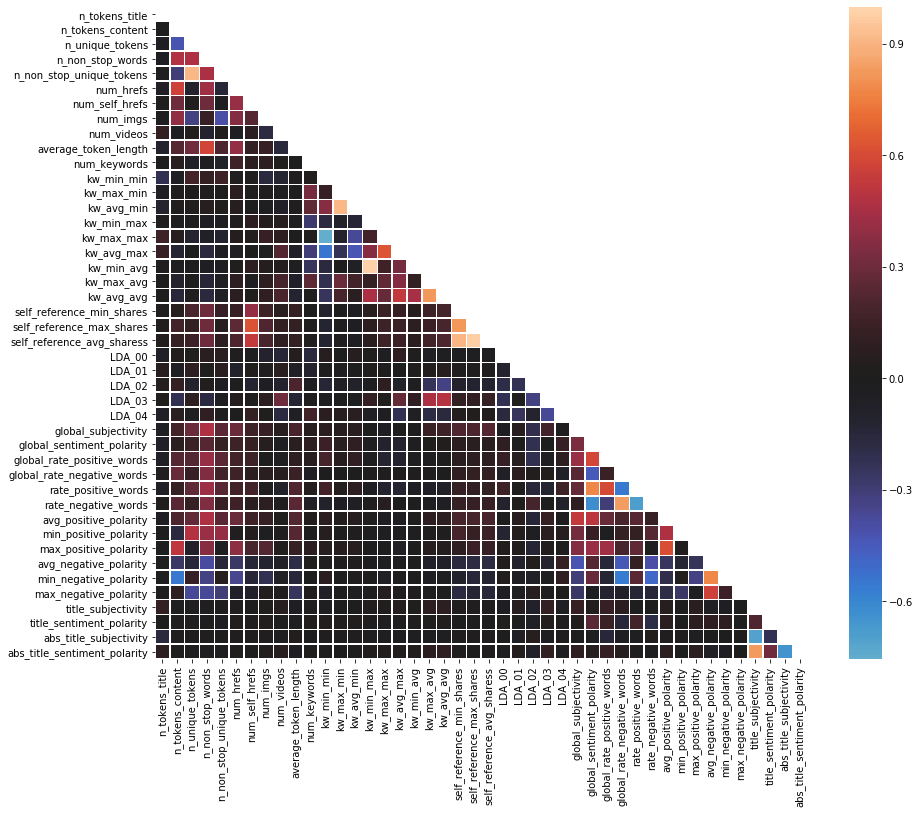

In [72]:
corr=df[num].corr()
plt.figure(figsize=[15,12])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(corr, mask=mask, center=0, square=True, linewidths=.5)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()
